In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, roc_auc_score)

train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')


categorical_features = ['Pclass', 'Sex', 'Embarked']
target = 'Survived'


for df in [train_df, test_df]:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


X = train_df[categorical_features]
y = train_df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

/tmp/ipykernel_36/637090828.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


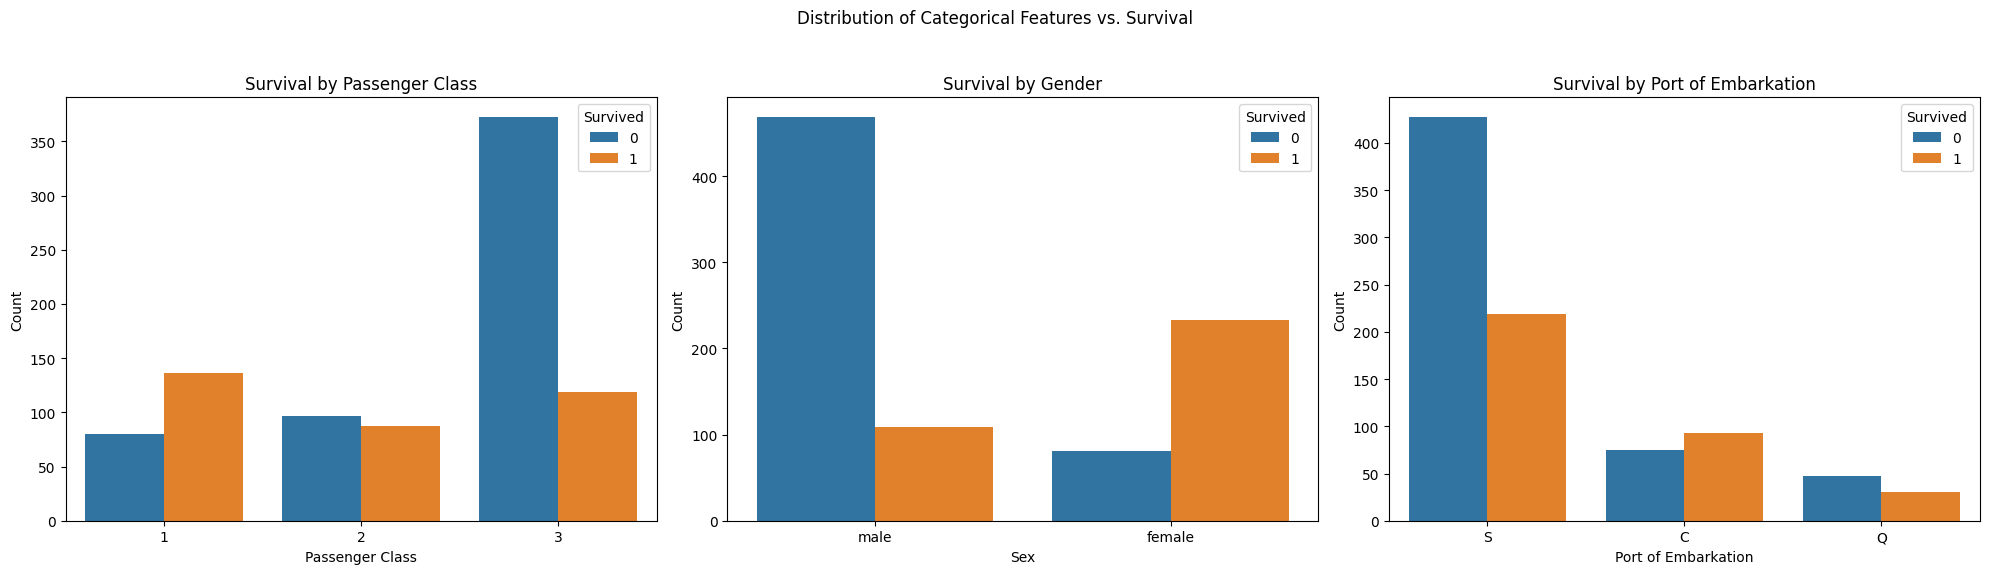

In [3]:

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Categorical Features vs. Survival')

sns.countplot(ax=axes[0], data=train_df, x='Pclass', hue='Survived')
axes[0].set_title('Survival by Passenger Class')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Count')


sns.countplot(ax=axes[1], data=train_df, x='Sex', hue='Survived')
axes[1].set_title('Survival by Gender')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')

sns.countplot(ax=axes[2], data=train_df, x='Embarked', hue='Survived')
axes[2].set_title('Survival by Port of Embarkation')
axes[2].set_xlabel('Port of Embarkation')
axes[2].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [4]:

pipeline_catnb = Pipeline([
    ('encoder', OrdinalEncoder()),
    ('model', CategoricalNB())
])

pipeline_catnb.fit(X_train, y_train)
y_pred_catnb = pipeline_catnb.predict(X_val)
y_prob_catnb = pipeline_catnb.predict_proba(X_val)[:, 1] 

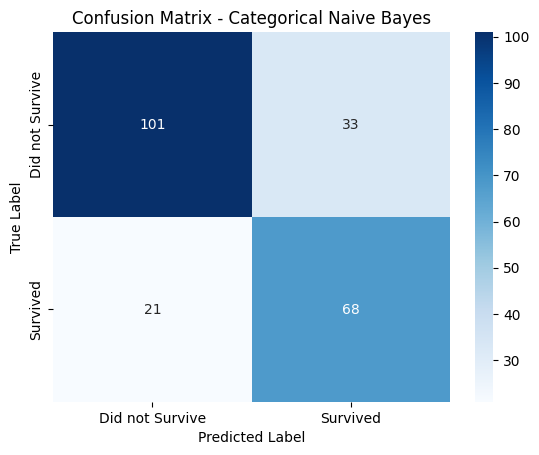

In [5]:

cm_catnb = confusion_matrix(y_val, y_pred_catnb)
sns.heatmap(cm_catnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.title('Confusion Matrix - Categorical Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [6]:

print("--- Categorical Naive Bayes Performance ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred_catnb):.4f}")
print(classification_report(y_val, y_pred_catnb))

--- Categorical Naive Bayes Performance ---
Accuracy: 0.7578
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       134
           1       0.67      0.76      0.72        89

    accuracy                           0.76       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.76      0.76       223



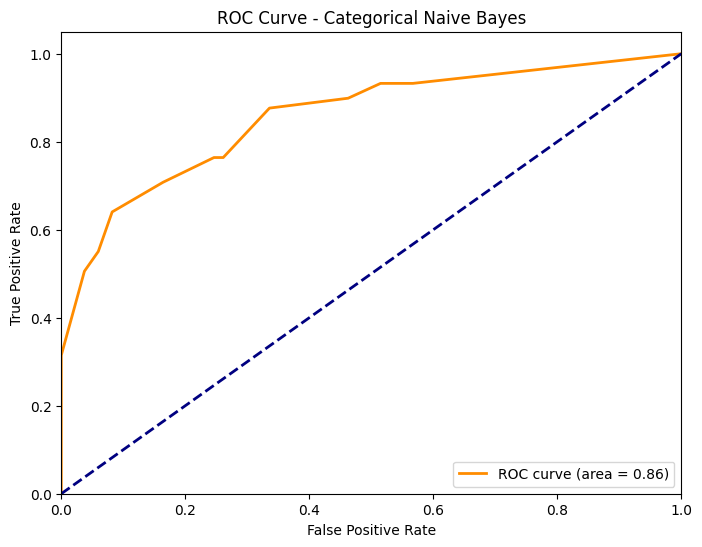

In [7]:

fpr_catnb, tpr_catnb, _ = roc_curve(y_val, y_prob_catnb)
auc_catnb = roc_auc_score(y_val, y_prob_catnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_catnb, tpr_catnb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_catnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Categorical Naive Bayes')
plt.legend(loc="lower right")
plt.show()